Number of classes data contains: 3
Data is imbalanced with class counts as follows:
2.0    147
1.0    134
3.0     69
k-NN Model Performance:
Accuracy (k-NN): 0.8066666666666666
Confusion Matrix (k-NN):
 [[41  9  3]
 [ 5 52  1]
 [11  0 28]]
Classification Report (k-NN):
               precision    recall  f1-score   support

         1.0       0.72      0.77      0.75        53
         2.0       0.85      0.90      0.87        58
         3.0       0.88      0.72      0.79        39

    accuracy                           0.81       150
   macro avg       0.82      0.80      0.80       150
weighted avg       0.81      0.81      0.81       150


Linear Classifier Model Performance:
Accuracy (Linear Classifier): 0.3466666666666667
Confusion Matrix (Linear Classifier):
 [[25 22  6]
 [32 25  1]
 [22 15  2]]
Classification Report (Linear Classifier):
               precision    recall  f1-score   support

         1.0       0.32      0.47      0.38        53
         2.0       0.40      0.4

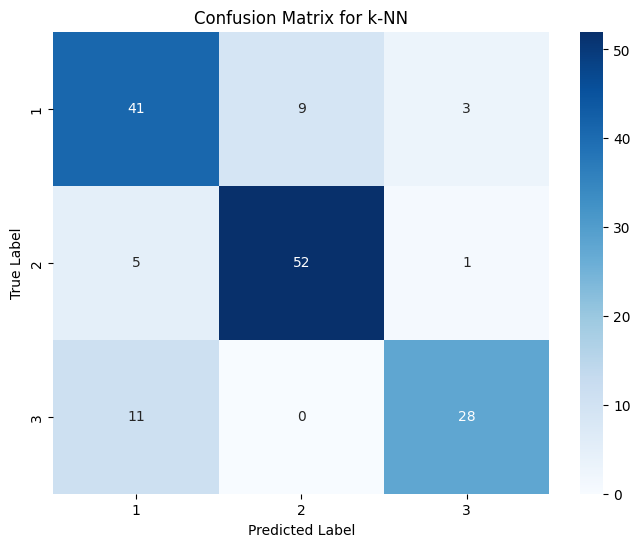

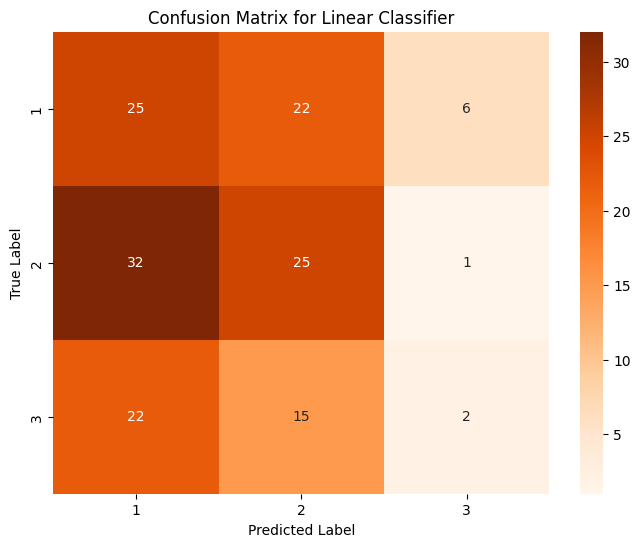

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

train_data = pd.read_csv('train_data.csv', header=None)
test_data = pd.read_csv('test_data.csv', header=None)
X_train = train_data[[0, 1, 2]].values 
y_train = train_data[3].values         
X_test = test_data[[0, 1, 2]].values   
y_test = test_data[3].values         
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)
num_classes = np.unique(y_train).shape[0]  
class_counts = pd.Series(y_train).value_counts() 

###########################################################  k-NN classifier
# Function to compute Euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# k-NN classifier
def k_nearest_neighbors(X_train, y_train, X_test, k=3):
    y_pred = []
    for test_point in X_test:
        # Calculate the distance between the test point and all training points
        distances = [euclidean_distance(test_point, x_train) for x_train in X_train]
        
        # Get the k nearest neighbors
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_indices]
        
        # Majority vote: choose the most frequent class among the neighbors
        most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
        y_pred.append(int(most_common))  # Ensure the result is an integer, not np.float64
    return y_pred
k = 3 
y_pred_knn = k_nearest_neighbors(X_train_standardized, y_train, X_test_standardized, k)
###########################################################  Linear Classifier (multi-class SVM-like)
def linear_classifier(X_train, y_train, X_test):
    n_classes = np.unique(y_train).shape[0]
    weights = np.random.randn(n_classes, X_train.shape[1])
    bias = np.random.randn(n_classes)
    def decision_function(x, class_idx):
        return np.dot(x, weights[class_idx]) + bias[class_idx]
    y_pred = []
    for x in X_test:
        class_scores = [decision_function(x, i) for i in range(n_classes)]
        y_pred.append(int(np.argmax(class_scores) + 1))  # Ensure result is integer (class labels are 1, 2, 3)
    return y_pred
y_pred_linear = linear_classifier(X_train_standardized, y_train, X_test_standardized)
#################### Output number of classes and balance #####################
print("Number of classes data contains:", num_classes)
print("Data is imbalanced with class counts as follows:")
print(class_counts.to_string())
########################### Performance Evaluation ##############################
print("k-NN Model Performance:")
print("Accuracy (k-NN):", accuracy_score(y_test, y_pred_knn))
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix (k-NN):\n", conf_matrix_knn)
print("Classification Report (k-NN):\n", classification_report(y_test, y_pred_knn))
print("\nLinear Classifier Model Performance:")
print("Accuracy (Linear Classifier):", accuracy_score(y_test, y_pred_linear))
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)
print("Confusion Matrix (Linear Classifier):\n", conf_matrix_linear)
print("Classification Report (Linear Classifier):\n", classification_report(y_test, y_pred_linear))
########################## Confusion Matrix Plots ##############################
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.title("Confusion Matrix for k-NN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_linear, annot=True, fmt="d", cmap="Oranges", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.title("Confusion Matrix for Linear Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

